In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

## (a) Download the Breast Cancer Wisconsin Data Set. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [24]:
filepath = 'https://raw.githubusercontent.com/seongohr/ML/master/wdbc.data'
df = pd.read_csv(filepath, sep=',', header=None)

In [25]:
df = df.drop(columns=[0])
df = df.replace({'B': 1, 'M': 0})

In [26]:
df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [27]:
num_M = round(len(df[(df[1]==0)])*0.2)
num_B = round(len(df[(df[1]==1)])*0.2)
df_M = df[(df[1]==-1)]
#df_M.reset_index()
df_B = df[(df[1]==1)]
test_df = df_M.iloc[:num_M,:]
train_df =  df_M.iloc[num_M:,:]
test_df = pd.concat([test_df, df_B.iloc[:num_B,:]])
train_df = pd.concat([train_df, df_B.iloc[num_B:,:]])                

In [28]:
print('test data set', test_df.shape)
print('train dataset', train_df.shape)

test data set (71, 31)
train dataset (286, 31)


In [29]:
#train_df

## (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learing M=30 times, and use randomly selected train and test data (make sure you us 20% of both the positive and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

## i. Supervised Learning: Train L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuray, percision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [30]:
#from sklearn.svm import LinearSVC

iterNum = 30
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]} 
result_svm_L1 = []
pred = []
pred_proba = []
y_true = []
num = 0

for i in range(iterNum):
    # Splitting data (test:train = 20:80)
    x_train, x_test, y_train, y_test = train_test_split(df.loc[:,2:], df.loc[:,1], test_size=0.2, stratify=df.loc[:,1])
    
    # Normalization (Standardization)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    
    l1_svm = LinearSVC(loss='l2', penalty='l1', dual=False)
    warnings.filterwarnings("ignore")
    grid = GridSearchCV(l1_svm,param_grid,cv=StratifiedKFold(n_splits=5))
    grid.fit(x_train,y_train)
    
    #best C
    best_params = grid.best_params_
    
    #prediction
    train_pred = grid.predict(x_train)
    test_pred = grid.predict(x_test)
    train_pred_decision = grid.decision_function(x_train)
    test_pred_decision = grid.decision_function(x_test)

    #accuracy score
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    #precision, recall, F-score
    train_precision, train_recall, train_fscore, train_support = precision_recall_fscore_support(y_train, train_pred, average='binary')
    test_precision, test_recall, test_fscore, test_support = precision_recall_fscore_support(y_test, test_pred, average='binary')
    
    #auc
    train_auc = roc_auc_score(y_train, train_pred_decision)
    test_auc = roc_auc_score(y_test, test_pred_decision)
    
    result_svm_L1.append([i+1, best_params['C'], train_accuracy, train_precision, train_recall, train_fscore, train_auc,
                         test_accuracy, test_precision, test_recall, test_fscore, test_auc])
    
    if i == iterNum-1:
        y_true = [y_train, y_test]
        pred = [train_pred, test_pred]
        pred_decision = [train_pred_decision, test_pred_decision]
        num = i+1
        
result_svm_L1 = pd.DataFrame(result_svm_L1, columns = ['','best C', 'train accuracy', 'train precision', 'train recall',
                                                       'train F-score', 'train AUC','test accuracy', 'test precision',
                                                       'test recall', 'test F-score', 'test AUC'])
result_svm_L1.set_index('', inplace = True)

In [31]:
result_svm_L1

#i, best_params, train_accuracy, train_precision, train_recall, train_fscore, train_auc,
#                         test_accuracy, test_precision, test_recall, test_fscore, test_auc]

,best C,train accuracy,train precision,train recall,train F-score,train AUC,test accuracy,test precision,test recall,test F-score,test AUC
,,,,,,,,,,,
1,0.10,0.980220,0.979167,0.989474,0.984293,0.996409,0.973684,0.972603,0.986111,0.979310,0.996032
2,0.10,0.991209,0.986159,1.000000,0.993031,0.997461,0.973684,0.972603,0.986111,0.979310,0.997354
3,0.10,0.984615,0.982639,0.992982,0.987784,0.997358,0.964912,0.959459,0.986111,0.972603,0.995040
4,0.10,0.982418,0.979239,0.992982,0.986063,0.995645,0.964912,0.959459,0.986111,0.972603,0.989087
5,0.10,0.989011,0.989510,0.992982,0.991243,0.997234,0.964912,0.947368,1.000000,0.972973,0.996693
6,0.10,0.989011,0.986111,0.996491,0.991274,0.996388,0.973684,0.972603,0.986111,0.979310,0.992725
7,0.10,0.986813,0.989474,0.989474,0.989474,0.999051,0.964912,0.959459,0.986111,0.972603,0.984458
8,0.10,0.982418,0.982578,0.989474,0.986014,0.996904,0.973684,0.972603,0.986111,0.979310,0.997354
9,0.10,0.986813,0.982699,0.996491,0.989547,0.998246,0.973684,0.985915,0.972222,0.979021,0.985450


### Average

In [32]:
result_svm_L1_avg = pd.DataFrame(result_svm_L1.mean(axis=0)).T
part1_result = pd.DataFrame(result_svm_L1_avg.loc[:, 'train accuracy':])
result_svm_L1_avg.loc[:, 'train accuracy':]

,train accuracy,train precision,train recall,train F-score,train AUC,test accuracy,test precision,test recall,test F-score,test AUC
0,0.985934,0.983587,0.994152,0.988834,0.997036,0.969591,0.969233,0.983333,0.976108,0.993144


iteration index number:  30 

train data

[[163   7]
 [  1 284]] 



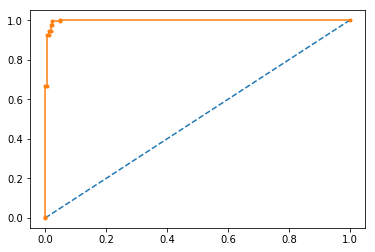

test data

[[39  3]
 [ 2 70]] 



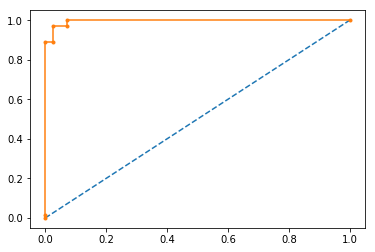

In [33]:
print('iteration index number: ', num, '\n')

# Plot confusin matrix & ROC
for i in range(len(y_true)):
    cm = confusion_matrix(y_true[i], pd.DataFrame(pred[i]))
    fpr, tpr, threshold = metrics.roc_curve(y_true[i], pred_decision[i])
    if i == 0:
        print('train data\n')
    else :
        print('test data\n')
    print(cm, '\n')

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()

## ii. Semi-Supervised Learning/ Self-training : select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can selet them randomly.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,2:], df.loc[:,1], test_size=0.2, stratify=df.loc[:,1])
x_labeled, x_unlabeled, y_labeled,_ = train_test_split(x_train, y_train, test_size=0.5, stratify=y_train)
## set unlabeled index -> ignore
## or
## unlabeled index -> decision function index

In [35]:
result_svm_semi=[]
iterNum = 30
y_true = []
pred = []
pred_decision = []
num = 0

# randomly choose test data and train data set (test:train = 2:8)
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,2:], df.loc[:,1], test_size=0.2, stratify=df.loc[:,1])
#x_train = MinMaxScaler().fit_transform(x_train)
#x_test = MinMaxScaler().fit_transform(x_test)
# standardization(Normalization)
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

# Create my estimator and prepare the parameter grid dictionary
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]} 
svm_l1_semi = LinearSVC(loss='l2', penalty='l1', dual=False)

#iterating 30 times
for i in range(iterNum):
    # split data as labeled set and unlabeled set(50:50)
    x_labeled, x_unlabeled, y_labeled,_ = train_test_split(x_train, y_train, test_size=0.5, stratify=y_train)
    
    #find C using cross validation
    grid = GridSearchCV(svm_l1_semi,param_grid,cv=StratifiedKFold(n_splits=5))
    grid.fit(x_labeled,y_labeled)
    #best C
    best_params = grid.best_params_
    
    # capture and fit the best estimator from across the grid search
    best_svm = grid.best_estimator_
    num_unlabeled = len(x_unlabeled)
    while num_unlabeled > 0:
        # train svm with labeled data
        best_svm.fit(x_labeled, y_labeled)

        # find the distance of unlabeled data form the decision boundary
        decision = best_svm.decision_function(x_unlabeled)
        coef = best_svm.coef_
        norms = np.linalg.norm(coef)
        distance = decision/norms
        distance = np.array(distance)
        
        # change to absolute values
        distance = np.absolute(distance)
        
        # find the index of farthest one from unlabeled set
        idx = np.where(distance == np.max(distance))
        
        # labeling the farthest unlabeled one with svm
        unlabeled_test = x_unlabeled[idx]
        pred = best_svm.predict(unlabeled_test)
        
        # add newly labeled one to labeled data
        x_labeled = np.append(x_labeled, unlabeled_test, axis=0)
        y_labeled = y_labeled.append(pd.Series(pred), ignore_index=True)
        
        # delete labeled one from unlabeled set
        x_unlabeled = np.delete(x_unlabeled, idx, 0)
        
        # Test the final SVM on the test data
        if num_unlabeled==1:
            #prediction
            train_pred = grid.predict(x_labeled)
            test_pred = grid.predict(x_test)
            train_pred_decision = grid.decision_function(x_labeled)
            test_pred_decision = grid.decision_function(x_test)

            #accuracy score
            train_accuracy = accuracy_score(y_labeled, train_pred)
            test_accuracy = accuracy_score(y_test, test_pred)

            #precision, recall, F-score
            train_precision, train_recall, train_fscore, train_support = precision_recall_fscore_support(y_labeled, train_pred, average='binary')
            test_precision, test_recall, test_fscore, test_support = precision_recall_fscore_support(y_test, test_pred, average='binary')

            #auc
            train_auc = roc_auc_score(y_labeled, train_pred_decision)
            test_auc = roc_auc_score(y_test, test_pred_decision)
            
            #save results
            result_svm_semi.append([i+1, best_params['C'], train_accuracy, train_precision, train_recall, train_fscore, train_auc,
                                 test_accuracy, test_precision, test_recall, test_fscore, test_auc])      
        
        # compute the number of unlabeled points
        num_unlabeled = len(x_unlabeled)
        
    if i == iterNum-1:
        y_true = [y_labeled, y_test]
        pred = [train_pred, test_pred]
        pred_decision = [train_pred_decision, test_pred_decision]
        num = i+1

#save
result_svm_semi = pd.DataFrame(result_svm_semi, columns = ['','best C', 'train accuracy', 'train precision', 'train recall',
                                                   'train F-score', 'train AUC','test accuracy', 'test precision',
                                                   'test recall', 'test F-score', 'test AUC'])
result_svm_semi.set_index('', inplace = True)

## A. Train an L1-penalized SVM to classify the labeled data. Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [36]:
result_svm_semi.loc[:, :'best C']

,best C
,
1,0.1
2,0.1
3,10000.0
4,0.1
5,0.1
6,0.1
7,1.0
8,0.1
9,0.1


## B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [37]:
result_svm_semi

,best C,train accuracy,train precision,train recall,train F-score,train AUC,test accuracy,test precision,test recall,test F-score,test AUC
,,,,,,,,,,,
1,0.1,0.995604,0.993174,1.000000,0.996575,0.996354,0.964912,0.947368,1.000000,0.972973,0.997024
2,0.1,0.995604,0.993007,1.000000,0.996491,0.996891,0.964912,0.959459,0.986111,0.972603,0.992725
3,10000.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.964912,0.947368,1.000000,0.972973,0.997354
4,0.1,0.991209,0.992982,0.992982,0.992982,0.998947,0.973684,0.972603,0.986111,0.979310,0.986442
5,0.1,0.989011,0.989583,0.993031,0.991304,0.999191,0.973684,0.960000,1.000000,0.979592,0.986111
6,0.1,0.991209,0.993056,0.993056,0.993056,0.999626,0.973684,0.960000,1.000000,0.979592,0.985780
7,1.0,0.995604,0.996516,0.996516,0.996516,0.999834,0.956140,0.958904,0.972222,0.965517,0.997354
8,0.1,0.986813,0.986348,0.993127,0.989726,0.996207,0.956140,0.946667,0.986111,0.965986,0.997685
9,0.1,0.997802,0.996610,1.000000,0.998302,0.998204,0.973684,0.960000,1.000000,0.979592,1.000000


### Average

In [38]:
result_svm_semi_avg = pd.DataFrame(result_svm_semi.mean(axis=0)).T
part1_result = pd.concat([part1_result,result_svm_semi_avg.loc[:, 'train accuracy':]], ignore_index=True )
result_svm_semi_avg.loc[:, 'train accuracy':]

,train accuracy,train precision,train recall,train F-score,train AUC,test accuracy,test precision,test recall,test F-score,test AUC
0,0.992308,0.990591,0.997339,0.993948,0.998215,0.971345,0.966712,0.988889,0.977583,0.993276


iteration index number:  30 

train data

[[168   3]
 [  0 284]] 



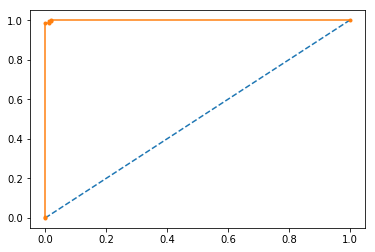

test data

[[41  1]
 [ 3 69]] 



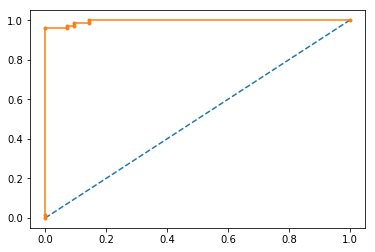

In [39]:
print('iteration index number: ', num, '\n')

for i in range(len(y_true)):
    cm = confusion_matrix(y_true[i], pd.DataFrame(pred[i]))
    fpr, tpr, threshold = metrics.roc_curve(y_true[i], pred_decision[i])
    #print('fpr', fpr)
    #print('tpr', tpr)
    #print('threshold', threshold)
    if i == 0:
        print('train data\n')
    else :
        print('test data\n')
    print(cm, '\n')

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()

## iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k=2.

## A. Run the k-means algorithm multiple times. Make sure that you initialize the algorithm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

### Answer : Whenever I train it, I set initial point randomly.

In [40]:
def computeProbaScore(transformed_x, changed):
    sum_arr = np.sum(transformed_x, axis=1)
    for i in range(len(transformed_x)):
        transformed_x[i][0] = transformed_x[i][0]/sum_arr[i]
        transformed_x[i][1] = transformed_x[i][1]/sum_arr[i]
    #print('original:', transformed_x)
    if changed :
        transformed_x = transformed_x[:,1]
    else :
        transformed_x = transformed_x[:,0]
    #print('swithced?', changed)
    #print('final proba score:', transformed_x)
    return transformed_x

In [41]:
def findTrueLabel(kmeans, trueLabel):
    switch = 0
    
    # find the closest one from each center
    transformed_distance = kmeans.transform(x_train)
    transformed_distance = pd.DataFrame(transformed_distance)
    transformed_distance['pred label'] = kmeans.labels_
    transformed_distance['true label'] = trueLabel
    
    # closest 30
    closest_30_0 = transformed_distance.sort_values(by=0).iloc[0:30]
    closest_30_1 = transformed_distance.sort_values(by=1).iloc[0:30]
    
    # compare with the true label
    true_max_value_0 = closest_30_0.groupby('true label').count().iloc[:,1].index[0]
    true_max_value_1 = closest_30_1.groupby('true label').count().iloc[:,1].index[0]
    
    # check if the label names should be changed
    if true_max_value_1 != 1:
        switched = 1

    return transformed_distance, switch

In [42]:
iterNum = 30
result_kmeans = []
y_true = []
pred = []
pred_decision = []
accuracy = 0.8
num = 0

for i in range(iterNum):
    #split training and test set(train:test = 8:2)
    x_train, x_test, y_train, y_test = train_test_split(df.loc[:,2:], df.loc[:,1], test_size=0.2, stratify=df.loc[:,1])
    # Normalization(Standardization)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    # train with training set
    kmeans = KMeans(n_clusters=2, init='random').fit(x_train)
    # label clusters with true value
    train_transformed, switched = findTrueLabel(kmeans, y_train.values)
    
    #prediction
    train_pred = train_transformed['pred label']
    test_pred = kmeans.predict(x_test)
    
    #label with true value
    if switched :
        train_transformed['pred label'].replace({0: max_value_0, 1: max_value_1}, inplace = True)
        test_pred = np.where(test_pred== 1, 0, 1)
        
    #make probability prediction
    train_pred_prob = computeProbaScore(kmeans.transform(x_train), switched)
    test_pred_prob = computeProbaScore(kmeans.transform(x_test), switched)
    

    #accuracy score (##work on test accuracy)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    #precision, recall, F-score
    train_precision, train_recall, train_fscore, train_support = precision_recall_fscore_support(y_train, train_pred, average='binary')
    test_precision, test_recall, test_fscore, test_support = precision_recall_fscore_support(y_test, test_pred, average='binary')
    
    #auc
    train_auc = roc_auc_score(y_train, train_pred_prob)
    test_auc = roc_auc_score(y_test, test_pred_prob)
    
    result_kmeans.append([i+1, train_accuracy, train_precision, train_recall, train_fscore, train_auc,
                         test_accuracy, test_precision, test_recall, test_fscore, test_auc])
    
    if accuracy < train_accuracy:
        accuracy = train_accuracy
        y_true = [y_train, y_test]
        pred = [train_pred, test_pred]
        pred_decision = [train_pred_prob, test_pred_prob]
        num = i+1
        
result_kmeans = pd.DataFrame(result_kmeans, columns = ['', 'train accuracy', 'train precision', 'train recall',
                                                       'train F-score', 'train AUC','test accuracy', 'test precision',
                                                       'test recall', 'test F-score', 'test AUC'])
result_kmeans.set_index('', inplace = True)


## B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

In [43]:
result_kmeans_avg = pd.DataFrame(result_kmeans.mean(axis=0)).T
part1_result = pd.concat([part1_result,result_kmeans_avg], ignore_index=True)

In [44]:
result_kmeans.loc[:, :'train AUC']

,train accuracy,train precision,train recall,train F-score,train AUC
,,,,,
1,0.896703,0.896667,0.943860,0.919658,0.964974
2,0.912088,0.918089,0.943860,0.930796,0.971393
3,0.912088,0.899023,0.968421,0.932432,0.970093
4,0.101099,0.097403,0.052632,0.068337,0.031001
5,0.912088,0.899023,0.968421,0.932432,0.973602
6,0.083516,0.047945,0.024561,0.032483,0.030815
7,0.914286,0.899351,0.971930,0.934233,0.970423
8,0.903297,0.911263,0.936842,0.923875,0.974819
9,0.892308,0.885621,0.950877,0.917090,0.962105


### Average

In [45]:
result_kmeans_avg.loc[:, :'train AUC']

,train accuracy,train precision,train recall,train F-score,train AUC
0,0.661685,0.655823,0.679064,0.665353,0.68768


iteration index number:  22 

train data

[[141  29]
 [  8 277]] 



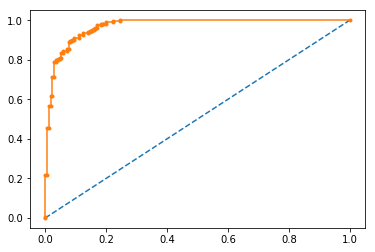

In [46]:
print('iteration index number: ', num, '\n')
i=0
#for i in range(len(y_true)):
cm = confusion_matrix(y_true[i], pd.DataFrame(pred[i]))
fpr, tpr, threshold = metrics.roc_curve(y_true[i], pred_decision[i])
#print('fpr', fpr)
#print('tpr', tpr)
#print('threshold', threshold)
if i == 0:
    print('train data\n')
else :
    print('test data\n')
print(cm, '\n')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [47]:
result_kmeans.loc[:, 'test accuracy':]

,test accuracy,test precision,test recall,test F-score,test AUC
,,,,,
1,0.938596,0.933333,0.972222,0.952381,0.983466
2,0.894737,0.875000,0.972222,0.921053,0.962302
3,0.912281,0.897436,0.972222,0.933333,0.981151
4,0.061404,0.051282,0.027778,0.036036,0.027447
5,0.903509,0.886076,0.972222,0.927152,0.962632
6,0.122807,0.166667,0.097222,0.122807,0.023810
7,0.912281,0.918919,0.944444,0.931507,0.976190
8,0.921053,0.888889,1.000000,0.941176,0.952712
9,0.964912,0.959459,0.986111,0.972603,0.988757


### Average

In [48]:
result_kmeans_avg.loc[:, 'test accuracy':]

,test accuracy,test precision,test recall,test F-score,test AUC
0,0.667836,0.65638,0.691667,0.671249,0.689187


iteration index number:  22 

test data

[[33  9]
 [ 4 68]] 



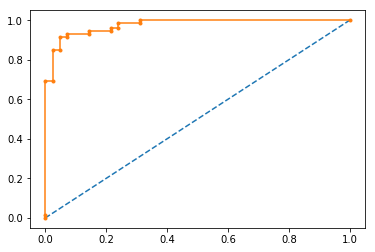

In [49]:
print('iteration index number: ', num, '\n')

i=1
#for i in range(len(y_true)):
cm = confusion_matrix(y_true[i], pd.DataFrame(pred[i]))
fpr, tpr, threshold = metrics.roc_curve(y_true[i], pred_decision[i])
#print('fpr', fpr)
#print('tpr', tpr)
#print('threshold', threshold)
if i == 0:
    print('train data\n')
else :
    print('test data\n')
print(cm, '\n')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clusters have the same balance as the one in original data set (if the positive class has p and the negative class has n sample, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters. Instead, use fit-predict method.

### Answer : Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well.

In [50]:
def findClass(pred, trueLabel):
    temp = pd.DataFrame(list(zip(pred, trueLabel.values)), columns=['pred', 'true'])
    temp_0 = temp[(temp['pred']==0)]
    temp_1 = temp[(temp['pred']==1)]
        
    if len(temp_0) != 0:
        lebel_0 = temp_0['true'].value_counts().nlargest(n=1).index[0]
    else :
        label_0 = -1
        
    if len(temp_1) != 0:
        label_1 = temp_1['true'].value_counts().nlargest(n=1).index[0]
    else :
        label_1 = -1
    
    #print(temp_0['true'].value_counts().nlargest(n=1).index[0])
    #print(temp_0['true'].value_counts().nlargest(n=1).index[0])
    
    return lebel_0, label_1

In [51]:
def probaScore(matrix):
    total_dist = 0
    for row in matrix:
        total_dist += sum(row)
    dist_row_02 = []
    for row in matrix:
        dist_row_02.append(1 - (sum(row)/total_dist))
    return np.array(dist_row_02)

In [52]:
## spectral clustering

from sklearn.cluster import SpectralClustering

iterNum = 30
result_spectral = []
y_true = []
pred = []
pred_decision = []
accuracy = 0.0
num = 0
switch = [0,0]

for i in range(iterNum):

    #split training and test set(train:test = 8:2)
    x_train, x_test, y_train, y_test = train_test_split(df.loc[:,2:], df.loc[:,1], test_size=0.2, stratify=df.loc[:,1])

    # Normalization(Standardization)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)

    # train with training set
    clustering = SpectralClustering(n_clusters=2, n_init=1000, gamma=1, eigen_tol=1e-9)

    # train prediction
    train_pred = clustering.fit_predict(x_train)
    # train  probability prediction
    train_pred_prob = probaScore(clustering.affinity_matrix_)

    # test prediction
    test_pred = clustering.fit_predict(x_test)
    # train  probability prediction
    test_pred_prob = probaScore(clustering.affinity_matrix_)

    # make sure the results has both classes
    #train_exist_0 = np.any(train_pred == 0)
    #train_exist_1 = np.any(train_pred == 1)
    #if exist_0 == True and exist_1 == True:
    #    iterNum = iterNum -1 
    #else:
    #    continue

    #get label
    train_label_0, train_label_1 = findClass(train_pred, y_train)
    test_label_0, test_label_1 = findClass(test_pred, y_test)
    if train_label_0 != 0 or train_label_1 !=0 :
        switch[0] = 1
    if test_label_0 != 0 or test_label_1 !=0 :
        switch[1] = 1    

    #label with true value
    train_pred = np.where(train_pred==0, train_label_0, train_label_1)
    test_pred = np.where(test_pred==0, test_label_0, test_label_1)

    #accuracy score (##work on test accuracy)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    #precision, recall, F-score
    train_precision, train_recall, train_fscore, train_support = precision_recall_fscore_support(y_train, train_pred, average='binary')
    test_precision, test_recall, test_fscore, test_support = precision_recall_fscore_support(y_test, test_pred, average='binary')

    #auc
    train_auc = roc_auc_score(y_train, train_pred_prob)
    test_auc = roc_auc_score(y_test, test_pred_prob)

    result_spectral.append([i+1, train_accuracy, train_precision, train_recall, train_fscore, train_auc,
                         test_accuracy, test_precision, test_recall, test_fscore, test_auc])

    if accuracy < train_accuracy:
        accuracy = train_accuracy
        y_true = [y_train, y_test]
        pred = [train_pred, test_pred]
        pred_decision = [train_pred_prob, test_pred_prob]
      
result_spectral = pd.DataFrame(result_spectral, columns = ['', 'train accuracy', 'train precision', 'train recall',
                                                           'train F-score', 'train AUC','test accuracy', 'test precision',
                                                           'test recall', 'test F-score', 'test AUC'])

result_spectral.set_index('', inplace = True)



In [53]:
result_spectral

,train accuracy,train precision,train recall,train F-score,train AUC,test accuracy,test precision,test recall,test F-score,test AUC
,,,,,,,,,,
1,0.628571,0.627753,1.0,0.771313,0.227214,0.640351,0.637168,1.000000,0.778378,0.197751
2,0.628571,0.627753,1.0,0.771313,0.232074,0.640351,0.637168,1.000000,0.778378,0.229993
3,0.628571,0.627753,1.0,0.771313,0.215294,0.640351,0.637168,1.000000,0.778378,0.274471
4,0.630769,0.629139,1.0,0.772358,0.213333,0.631579,0.631579,1.000000,0.774194,0.236772
5,0.626374,0.626374,1.0,0.770270,0.234035,0.631579,0.631579,1.000000,0.774194,0.205688
6,0.626374,0.626374,1.0,0.770270,0.210031,0.631579,0.631579,1.000000,0.774194,0.286045
7,0.630769,0.629139,1.0,0.772358,0.231249,0.640351,0.637168,1.000000,0.778378,0.156746
8,0.626374,0.626374,1.0,0.770270,0.231290,0.631579,0.631579,1.000000,0.774194,0.189815
9,0.630769,0.629139,1.0,0.772358,0.224830,0.649123,0.642857,1.000000,0.782609,0.177579


### Average

In [54]:
spectral_avg = pd.DataFrame(result_spectral.mean(axis=0)).T

part1_result = pd.concat([part1_result,spectral_avg], ignore_index=True)

spectral_avg

,train accuracy,train precision,train recall,train F-score,train AUC,test accuracy,test precision,test recall,test F-score,test AUC
0,0.629158,0.628124,1.0,0.771592,0.22163,0.654094,0.650498,0.998611,0.786274,0.233537


iteration index number:  0 

switch 1
train data

[[  2 168]
 [  0 285]] 



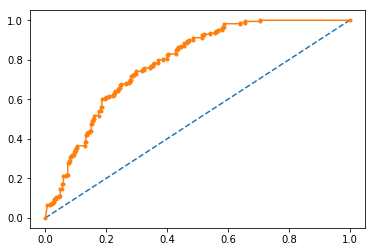

switch 1
test data

[[ 0 42]
 [ 0 72]] 



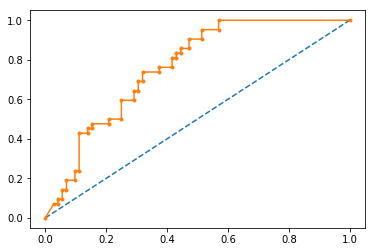

In [55]:
print('iteration index number: ', num, '\n')

for i in range(len(y_true)):
    cm = confusion_matrix(y_true[i], pd.DataFrame(pred[i]))
    print('switch', switch[i])
    if switch[i] == 1 :
            fpr, tpr, threshold = metrics.roc_curve(1-y_true[i], pred_decision[i])
    else:
        fpr, tpr, threshold = metrics.roc_curve(y_true[i], pred_decision[i])
    #print('fpr', fpr)
    #print('tpr', tpr)
    #print('threshold', threshold)
    if i == 0:
        print('train data\n')
    else :
        print('test data\n')
    print(cm, '\n')

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()

## v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled. One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods. 

In [56]:
part1_result

,train accuracy,train precision,train recall,train F-score,train AUC,test accuracy,test precision,test recall,test F-score,test AUC
0,0.985934,0.983587,0.994152,0.988834,0.997036,0.969591,0.969233,0.983333,0.976108,0.993144
1,0.992308,0.990591,0.997339,0.993948,0.998215,0.971345,0.966712,0.988889,0.977583,0.993276
2,0.661685,0.655823,0.679064,0.665353,0.687680,0.667836,0.656380,0.691667,0.671249,0.689187
3,0.629158,0.628124,1.000000,0.771592,0.221630,0.654094,0.650498,0.998611,0.786274,0.233537


### Answer : 
### 0: supervised, 1: semi-supervised, 2:k_means clustering, 3: spectralclustering

### In terms of test accuracy, supervised and semi-supervised has higher accuracy, but k-means clustering  and spectral clustering has very lower accuracy.

## 2. Active Learning Using Support Vector Machines

## (a) Download the banknote authentication Data Set. choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.


In [2]:
filepath2 = 'https://raw.githubusercontent.com/seongohr/ML/master/data_banknote_authentication.txt'
df2 = pd.read_csv(filepath2, sep=',', header=None)    

x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.loc[:,:3], df2.loc[:,4], test_size=0.344, stratify=df2.loc[:,4])

print('the number of test set : ', len(x_test2))
print('the number of training set : ', len(x_train2))

the number of test set :  472
the number of training set :  900


## (b)Repeat each of the following two procedure 50 times. You will have 50 errors for 90 SVMs per each procedure.

## i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ..., 900 data points and their 90 test errors. You have implemented passive learning.

In [3]:
def makeRandomPools(x, y):
    num = 90
    el_num = 10
    pools = []
    start_0 = 0
    start_1 = 0
    concat = []
    
    df = pd.concat([x,y], axis=1)
    df_0 = df[(df[4]==0)].sample(frac=1).reset_index(drop=True)
    df_1 = df[(df[4]==1)].sample(frac=1).reset_index(drop=True)
    
    q_0 = int(len(df_0)/num)
    r_0 = len(df_0) - (q_0*num)
    
    #print('q_0:', q_0)
    #print('r_0:', r_0)
    
    for i in range(num):
        #print('r_0 : ', r_0)
        if r_0 > 0:
            end_0 = start_0 + (q_0 + 1)
            end_1 = start_1 + (el_num - (q_0 + 1))
            #print(i, 'end_1: ', end_1)
        else: 
            end_0 = start_0 + q_0
            end_1 = start_1 + (el_num - q_0)
            #print(i, 'end_1: ', end_1)
        
        if i == num-1:
            one_pool_0 = df_0.iloc[start_0:]
            one_pool_1 = df_1.iloc[start_1:]
        else:
            one_pool_0 = df_0.iloc[start_0:end_0]
            one_pool_1 = df_1.iloc[start_1:end_1]
        
        one_pool = pd.concat([one_pool_0, one_pool_1], )
        if i == 0: 
            concat = one_pool
        else:
            concat = pd.concat([concat,one_pool])
        pools.append([concat.loc[:,:3],concat.loc[:,4:]])

        start_0 = end_0
        start_1 = end_1
        if r_0 >= 1 :
            r_0 = r_0 - 1
    return pools

In [5]:
# Linear kernal
iterNum = 50

# Create my estimator and prepare the parameter grid dictionary
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]} 
total_set = []

for i in range(iterNum):
    best_estimates = []
    best_params = []
    one_pool_set = []
    
    x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.loc[:,:3], df2.loc[:,4], test_size=0.344, stratify=df2.loc[:,4])
    
    # Standardization(Normalization)
    x_train2 = StandardScaler().fit_transform(x_train2)
    x_test2 = StandardScaler().fit_transform(x_test2)
    
    y_train2 = pd.DataFrame(y_train2)
    y_test2 = pd.DataFrame(y_test2)
    x_train2 = pd.DataFrame(x_train2, index = y_train2.index)
    x_test2 = pd.DataFrame(x_test2, index = y_test2.index)
    
    poolsArr = makeRandomPools(x_train2, y_train2)
    
    for j in range(len(poolsArr)):
        x = poolsArr[j][0]
        y = poolsArr[j][1]
        #print('length x:', len(x))
        #print('length y:', len(y))
        
        # train with linear kernel svm
        linear_svm = LinearSVC(loss='l2', penalty='l1', dual=False)
        warnings.filterwarnings("ignore")
        #grid = GridSearchCV(linear_svm,param_grid,cv=StratifiedKFold(n_splits=5))
        grid = GridSearchCV(linear_svm,param_grid,cv=KFold(n_splits=10))
        grid.fit(x,y)
        
        # best C
        best_params = grid.best_params_

        #prediction
        train_pred = grid.predict(x)
        test_pred = grid.predict(x_test2)
        train_pred_decision = grid.decision_function(x)
        test_pred_decision = grid.decision_function(x_test2)

        #accuracy score
        train_error = 1 - (accuracy_score(y, train_pred))
        test_error = 1- (accuracy_score(y_test2, test_pred))
        
        #add one pool result
        one_pool_set.append([j+1, best_params, train_error, test_error])
        #print(one_pool_set)
    # make dataframe for svm 90 model
    one_pool_set = pd.DataFrame(one_pool_set, columns = ['', 'best C', 'train error', 'test error'])
    one_pool_set.set_index('', inplace = True)
    # for total 50 iteration
    total_set.append(one_pool_set)



In [6]:
print('the number of models in one iteration:', len(total_set[0]))
print('the number of iteration:', len(total_set))
total_set[0]

the number of models in one iteration: 90
the number of iteration: 50


,best C,train error,test error
,,,
1,{'C': 1},0.000000,0.029661
2,{'C': 1},0.000000,0.029661
3,{'C': 1},0.000000,0.031780
4,{'C': 1},0.025000,0.021186
5,{'C': 1},0.020000,0.023305
6,{'C': 1},0.016667,0.023305
7,{'C': 1},0.014286,0.014831
8,{'C': 1},0.012500,0.014831
9,{'C': 0.1},0.033333,0.036017


In [7]:
# L-1 penalty with pool of 10 randomly selected data
iterNum = 50

# Create my estimator and prepare the parameter grid dictionary
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]} 
l1_total_set = []

for i in range(iterNum):
    best_estimates = []
    best_params = []
    one_pool_set = []
    
    x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.loc[:,:3], df2.loc[:,4], test_size=0.344, stratify=df2.loc[:,4])
    
    # Standardization(Normalization)
    x_train2 = StandardScaler().fit_transform(x_train2)
    x_test2 = StandardScaler().fit_transform(x_test2)
    
    y_train2 = pd.DataFrame(y_train2)
    y_test2 = pd.DataFrame(y_test2)
    x_train2 = pd.DataFrame(x_train2, index = y_train2.index)
    x_test2 = pd.DataFrame(x_test2, index = y_test2.index)
    
    poolsArr = makeRandomPools(x_train2, y_train2)
    
    for j in range(len(poolsArr)):
        x = poolsArr[j][0]
        y = poolsArr[j][1]
        #print('length x:', len(x))
        #print('length y:', len(y))
        
        # train with linear kernel svm
        linear_svm = LinearSVC(loss='l2', penalty='l1', dual=False)
        warnings.filterwarnings("ignore")
        #grid = GridSearchCV(linear_svm,param_grid,cv=StratifiedKFold(n_splits=5))
        grid = GridSearchCV(linear_svm,param_grid,cv=KFold(n_splits=10))
        grid.fit(x,y)
        
        # best C
        best_params = grid.best_params_

        #prediction
        train_pred = grid.predict(x)
        test_pred = grid.predict(x_test2)
        train_pred_decision = grid.decision_function(x)
        test_pred_decision = grid.decision_function(x_test2)

        #accuracy score
        train_error = 1 - (accuracy_score(y, train_pred))
        test_error = 1- (accuracy_score(y_test2, test_pred))
        
        #add one pool result
        one_pool_set.append([j+1, best_params, train_error, test_error])
        #print(one_pool_set)
    # make dataframe for svm 90 model
    one_pool_set = pd.DataFrame(one_pool_set, columns = ['', 'best C', 'train error', 'test error'])
    one_pool_set.set_index('', inplace = True)
    # for total 50 iteration
    l1_total_set.append(one_pool_set)

In [8]:
print('the number of models in one iteration:', len(l1_total_set[0]))
print('the number of iteration:', len(l1_total_set))

the number of models in one iteration: 90
the number of iteration: 50


## ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trainined using 10, 20, 30, ..., 900 data points and their 90 test errors. You have implemented active learning.


In [9]:
def findClosest(model, x, y, x_rest, y_rest):
    num = 10

    # find the distance of unlabeled data form the decision boundary
    decision = model.decision_function(x_rest)
    coef = model.coef_
    norms = np.linalg.norm(coef)
    distance = decision/norms

    distance = pd.DataFrame(distance, columns = ['distance'], index = x_rest.index)
    distance['y'] = y_rest.values
    distance = np.absolute(distance)
    
    # sort from closest point
    distance = distance.sort_values(by=['distance'])
    
    # get index of 10 closest point to decision boundary
    indexes = distance.iloc[:10, 0].index
    
    # add 10 closest point to the pool
    for i in range(num):
        x = pd.concat([x, pd.DataFrame(x_rest.loc[indexes[i]]).T])
        y = pd.concat([y, pd.DataFrame(y_rest.loc[indexes[i]]).T])
    
    # remove 10 closest points from the remained points
    for i in range(num):
        x_rest = x_rest.drop([indexes[i]])
        y_rest = y_rest.drop([indexes[i]])
    return x, y, x_rest, y_rest

In [11]:
# Linear kernal
iterNum = 50
modelNum = 90


# Create my estimator and prepare the parameter grid dictionary
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]} 
total_set_2 = []

for i in range(iterNum):
    best_estimates = []
    best_params = []
    one_pool_set = []
    
    x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.loc[:,:3], df2.loc[:,4], test_size=0.344, stratify=df2.loc[:,4])
    
    # Standardization(Normalization)
    x_train2 = StandardScaler().fit_transform(x_train2)
    x_test2 = StandardScaler().fit_transform(x_test2)
    
    x_rest, x, y_rest, y = train_test_split(x_train2, y_train2, test_size=0.011, stratify=y_train2)
    y = pd.DataFrame(y)
    y_rest = pd.DataFrame(y_rest)
    x = pd.DataFrame(x, index = y.index)
    x_rest = pd.DataFrame(x_rest, index = y_rest.index)
    
    for j in range(modelNum):                
        # train with linear kernel svm
        linear_svm = LinearSVC(loss='l2', penalty='l1', dual=False)
        warnings.filterwarnings("ignore")
        grid = GridSearchCV(linear_svm,param_grid,cv=KFold(n_splits=10))
        grid.fit(x,y)        
        
        # best C
        best_params = grid.best_params_
        
        # svm with best parameters from cross validation
        best_svm = grid.best_estimator_
        best_svm.fit(x, y)

        #prediction
        train_pred = best_svm.predict(x)
        test_pred = best_svm.predict(x_test2)
        train_pred_decision = best_svm.decision_function(x)
        test_pred_decision = best_svm.decision_function(x_test2)

        #accuracy score
        train_error = 1 - (accuracy_score(y, train_pred))
        test_error = 1- (accuracy_score(y_test2, test_pred))
        
        #choose 10 closest data points in the training set to the hyperplane of the SVM
        if len(x_rest) > 0:
            x, y, x_rest, y_rest = findClosest(best_svm, x, y, x_rest, y_rest)
        
        #add one pool result
        one_pool_set.append([j+1, best_params, train_error, test_error])
        #print(one_pool_set)
        
    # make dataframe for svm 90 model
    one_pool_set = pd.DataFrame(one_pool_set, columns = ['', 'best C', 'train error', 'test error'])
    one_pool_set.set_index('', inplace = True)
    # for total 50 iteration
    total_set_2.append(one_pool_set)

In [12]:
#len(total_set_2)

print('the number of models in one iteration:', len(total_set_2[0]))
print('the number of iteration:', len(total_set_2))

the number of models in one iteration: 90
the number of iteration: 50


In [13]:
# L-1 penalty
iterNum = 50
modelNum = 90

# Create my estimator and prepare the parameter grid dictionary
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]} 
l1_total_set_2 = []

for i in range(iterNum):
    best_estimates = []
    best_params = []
    one_pool_set = []
    
    # split training set and test set
    x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.loc[:,:3], df2.loc[:,4], test_size=0.344, stratify=df2.loc[:,4])

    # Standardization(Normalization)
    x_train2 = StandardScaler().fit_transform(x_train2)
    x_test2 = StandardScaler().fit_transform(x_test2)
    
    # split pool
    x_rest, x, y_rest, y = train_test_split(x_train2, y_train2, test_size=0.011, stratify=y_train2)
    y = pd.DataFrame(y)
    y_rest = pd.DataFrame(y_rest)
    x = pd.DataFrame(x, index = y.index)
    x_rest = pd.DataFrame(x_rest, index = y_rest.index)

    for j in range(modelNum):
        # train with L1-penalty
        linear_svm = LinearSVC(loss='l2', penalty='l1', dual=False)
        warnings.filterwarnings("ignore")
        grid = GridSearchCV(linear_svm,param_grid,cv=KFold(n_splits=10))
        grid.fit(x,y)
        
        # best C
        best_params = grid.best_params_

        # svm with best parameters from cross validation
        best_svm = grid.best_estimator_
        best_svm.fit(x, y)

        #prediction
        train_pred = best_svm.predict(x)
        test_pred = best_svm.predict(x_test2)
        train_pred_decision = best_svm.decision_function(x)
        test_pred_decision = best_svm.decision_function(x_test2)

        #accuracy score
        train_error = 1 - (accuracy_score(y, train_pred))
        test_error = 1- (accuracy_score(y_test2, test_pred))
        
        #choose 10 closest data points in the training set to the hyperplane of the SVM
        if len(x_rest) > 0:
            x, y, x_rest, y_rest = findClosest(best_svm, x, y, x_rest, y_rest)
        
        #add one pool result
        one_pool_set.append([j+1, best_params, train_error, test_error])
        #print(one_pool_set)
    # make dataframe for svm 90 model
    one_pool_set = pd.DataFrame(one_pool_set, columns = ['', 'best C', 'train error', 'test error'])
    one_pool_set.set_index('', inplace = True)
    # for total 50 iteration
    l1_total_set_2.append(one_pool_set)

In [14]:
#len(l1_total_set_2)

print('the number of models in one iteration:', len(l1_total_set_2[0]))
print('the number of iteration:', len(l1_total_set_2))

the number of models in one iteration: 90
the number of iteration: 50


## (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus numbers of training instances for both active and passive learners on the same figure and report your conclusion. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [15]:
def computeAverage(dataset):
    iNum = len(dataset)
    #print('iNum:', iNum)
    modelNum = len(dataset[0])
    #print('modelNum:', modelNum)
    s_train = 0
    s_test = 0
    avg_train = 0
    avg_test = 0
    average_dataset = []
    
    for j in range(1, modelNum+1):
        s_train = 0
        s_test = 0
        avg_train = 0
        avg_test = 0
        for i in range(iNum):
            #print(i, j)
            s_train += dataset[i].loc[j, 'train error']
            s_test += dataset[i].loc[j, 'test error']
            
        avg_train = s_train / iNum
        avg_test = s_test / iNum
        average_dataset.append([avg_train, avg_test])
    return average_dataset
        

In [16]:
passive_linear_avg = computeAverage(total_set)
passive_linear_avg = pd.DataFrame(passive_linear_avg, columns = ['train error', 'test error'])
passive_linear_avg

,train error,test error
0,0.024000,0.116695
1,0.017000,0.068644
2,0.012000,0.046229
3,0.009500,0.030466
4,0.010000,0.025763
5,0.009333,0.025297
6,0.010571,0.024831
7,0.011750,0.024153
8,0.009333,0.023644
9,0.009800,0.022669


In [17]:
passive_l1_avg = computeAverage(l1_total_set)
passive_l1_avg = pd.DataFrame(passive_l1_avg, columns = ['train error', 'test error'])
passive_l1_avg

,train error,test error
0,0.022000,0.118898
1,0.006000,0.061314
2,0.011333,0.041907
3,0.010000,0.034788
4,0.008400,0.032246
5,0.008333,0.029873
6,0.009714,0.026441
7,0.007500,0.024364
8,0.007333,0.022373
9,0.007600,0.022712


In [18]:
active_linear_avg = computeAverage(total_set_2)
active_linear_avg = pd.DataFrame(active_linear_avg, columns = ['train error', 'test error'])
#active_linear_avg['n'] = np.arange(10, 901, 10)
active_linear_avg

,train error,test error
0,0.014000,0.113136
1,0.005000,0.059195
2,0.007333,0.037924
3,0.013500,0.026059
4,0.026800,0.016314
5,0.045333,0.012754
6,0.079714,0.011737
7,0.092750,0.011144
8,0.090667,0.011186
9,0.081600,0.011186


In [19]:
active_l1_avg = computeAverage(l1_total_set_2)
active_l1_avg = pd.DataFrame(active_l1_avg, columns = ['train error', 'test error'])
active_l1_avg

,train error,test error
0,0.020000,0.114534
1,0.011000,0.058814
2,0.009333,0.031186
3,0.020000,0.025381
4,0.035200,0.020424
5,0.048333,0.013771
6,0.078000,0.012924
7,0.091000,0.012712
8,0.088222,0.012415
9,0.081000,0.012288


In [20]:
part2_test_error = pd.DataFrame({'active linear':active_linear_avg['test error'], 
                             'passive linear':passive_linear_avg['test error'], 
                             'active L1':active_l1_avg['test error'], 
                             'passive L1':passive_l1_avg['test error']})
part2_test_error['n'] = np.arange(10, 901, 10)

In [21]:
part2_test_error

,active linear,passive linear,active L1,passive L1,n
0,0.113136,0.116695,0.114534,0.118898,10
1,0.059195,0.068644,0.058814,0.061314,20
2,0.037924,0.046229,0.031186,0.041907,30
3,0.026059,0.030466,0.025381,0.034788,40
4,0.016314,0.025763,0.020424,0.032246,50
5,0.012754,0.025297,0.013771,0.029873,60
6,0.011737,0.024831,0.012924,0.026441,70
7,0.011144,0.024153,0.012712,0.024364,80
8,0.011186,0.023644,0.012415,0.022373,90
9,0.011186,0.022669,0.012288,0.022712,100


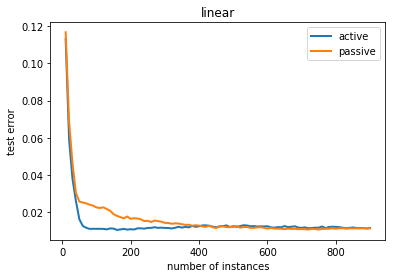

In [22]:
import matplotlib.pyplot as plt
plt.plot(part2_test_error['n'], part2_test_error['active linear'], linewidth=2.0, label='active')
plt.plot(part2_test_error['n'], part2_test_error['passive linear'], linewidth = 2.0, label='passive')
plt.title('linear')
plt.xlabel('number of instances')
plt.ylabel('test error')
plt.legend()
plt.show()


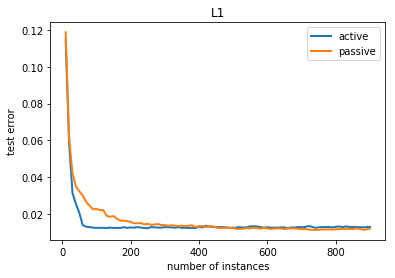

In [23]:
plt.plot(part2_test_error['n'], part2_test_error['active L1'], linewidth=2.0, label='active')
plt.plot(part2_test_error['n'], part2_test_error['passive L1'], linewidth = 2.0, label='passive')
plt.title('L1')
plt.xlabel('number of instances')
plt.ylabel('test error')
plt.legend()
plt.show()

### In both linear SVM and L1 SVM, active learners test errors are reduced faster than passive learners.